In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import statsmodels.formula.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('df_final_Karachi.csv', sep=',', na_values='\xa0' )
df.head()

,time,city,temperature_2m_mean,temperature_2m_max,temp_range,daylight,precipitation_sum,precipitation_hours,precipitation_rate,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2010-01-01,Karachi,20.9,26.0,11.2,10.633333,0.0,0,0.0,18.3,25.6,16.25,4.38
1,2010-01-02,Karachi,20.5,25.3,9.7,10.616667,0.0,0,0.0,24.6,35.3,9.15,3.84
2,2010-01-03,Karachi,19.9,25.0,10.7,10.633333,0.0,0,0.0,16.6,28.1,16.03,3.69
3,2010-01-04,Karachi,20.4,25.6,10.6,10.650000,0.0,0,0.0,14.0,22.7,16.32,3.63
4,2010-01-05,Karachi,20.7,25.4,9.1,10.650000,0.0,0,0.0,19.3,29.2,16.37,3.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        4966 non-null   object 
 1   city                        4966 non-null   object 
 2   temperature_2m_mean         4966 non-null   float64
 3   temperature_2m_max          4966 non-null   float64
 4   temp_range                  4966 non-null   float64
 5   daylight                    4966 non-null   float64
 6   precipitation_sum           4966 non-null   float64
 7   precipitation_hours         4966 non-null   int64  
 8   precipitation_rate          4966 non-null   float64
 9   windspeed_10m_max           4966 non-null   float64
 10  windgusts_10m_max           4966 non-null   float64
 11  shortwave_radiation_sum     4966 non-null   float64
 12  et0_fao_evapotranspiration  4966 non-null   float64
dtypes: float64(10), int64(1), object(

In [4]:
# convert the columns 'time' to datetime64:

df['time']=pd.to_datetime(df['time'])

In [5]:
# Extract "time" components:

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

In [6]:
# Drop "time" column after component extraction:

df.drop('time', axis=1, inplace=True)

In [7]:
print(df['city'].nunique())
print()
print(df['city'].unique())
print()
print(df['city'].value_counts())

1

['Karachi']

Karachi    4966
Name: city, dtype: int64


In [8]:
# Drop "city" column:

df.drop('city', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temperature_2m_mean         4966 non-null   float64
 1   temperature_2m_max          4966 non-null   float64
 2   temp_range                  4966 non-null   float64
 3   daylight                    4966 non-null   float64
 4   precipitation_sum           4966 non-null   float64
 5   precipitation_hours         4966 non-null   int64  
 6   precipitation_rate          4966 non-null   float64
 7   windspeed_10m_max           4966 non-null   float64
 8   windgusts_10m_max           4966 non-null   float64
 9   shortwave_radiation_sum     4966 non-null   float64
 10  et0_fao_evapotranspiration  4966 non-null   float64
 11  year                        4966 non-null   int64  
 12  month                       4966 non-null   int64  
 13  day                         4966 

In [10]:
df.head()

,temperature_2m_mean,temperature_2m_max,temp_range,daylight,precipitation_sum,precipitation_hours,precipitation_rate,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration,year,month,day
0,20.9,26.0,11.2,10.633333,0.0,0,0.0,18.3,25.6,16.25,4.38,2010,1,1
1,20.5,25.3,9.7,10.616667,0.0,0,0.0,24.6,35.3,9.15,3.84,2010,1,2
2,19.9,25.0,10.7,10.633333,0.0,0,0.0,16.6,28.1,16.03,3.69,2010,1,3
3,20.4,25.6,10.6,10.650000,0.0,0,0.0,14.0,22.7,16.32,3.63,2010,1,4
4,20.7,25.4,9.1,10.650000,0.0,0,0.0,19.3,29.2,16.37,3.55,2010,1,5


In [11]:
print(df['year'].nunique())
print()
print(df['year'].unique())
print()
#print(df['year'].value_counts())

14

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]



In [12]:
print(df['month'].nunique())
print()
print(df['month'].unique())
print()
#print(df['month'].value_counts())

12

[ 1  2  3  4  5  6  7  8  9 10 11 12]



In [13]:
print(df['day'].nunique())
print()
print(df['day'].unique())
print()
#print(df['day'].value_counts())

31

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]



In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_mean,4966.0,26.247382,3.986358,14.300000,23.300000,27.600,29.275000,37.100000
temperature_2m_max,4966.0,30.567861,3.645286,17.700000,28.500000,31.100,33.100000,43.200000
temp_range,4966.0,8.096899,3.121997,1.000000,5.300000,8.100,10.700000,18.200000
daylight,4966.0,12.169536,1.068760,10.583333,11.133333,12.200,13.216667,13.683333
precipitation_sum,4966.0,0.499376,3.744586,0.000000,0.000000,0.000,0.000000,119.300000
precipitation_hours,4966.0,0.677004,2.711949,0.000000,0.000000,0.000,0.000000,24.000000
precipitation_rate,4966.0,0.050230,0.241179,0.000000,0.000000,0.000,0.000000,5.680952
windspeed_10m_max,4966.0,24.021023,6.423371,9.000000,19.300000,23.700,28.200000,47.900000
windgusts_10m_max,4966.0,37.990475,9.369277,14.000000,31.300000,37.800,44.300000,79.600000
shortwave_radiation_sum,4966.0,20.120264,4.362582,1.320000,16.860000,19.755,23.607500,29.320000


In [15]:
# Finding correlation:

df_corr=df.corr(method='pearson')
df_corr

,temperature_2m_mean,temperature_2m_max,temp_range,daylight,precipitation_sum,precipitation_hours,precipitation_rate,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration,year,month,day
temperature_2m_mean,1.000000,0.925932,-0.480543,0.825419,0.058856,0.118134,0.098128,0.413877,0.428958,0.420904,0.456179,0.014454,0.207331,0.006205
temperature_2m_max,0.925932,1.000000,-0.123177,0.666832,-0.012254,-0.002707,0.015083,0.279871,0.302782,0.554922,0.611907,0.016072,0.165387,0.003152
temp_range,-0.480543,-0.123177,1.000000,-0.630378,-0.180434,-0.311005,-0.223683,-0.476707,-0.467379,0.157077,0.199258,-0.005678,-0.162652,-0.014822
daylight,0.825419,0.666832,-0.630378,1.000000,0.095830,0.179779,0.130134,0.591375,0.601093,0.460121,0.411354,0.025007,-0.118612,0.006160
precipitation_sum,0.058856,-0.012254,-0.180434,0.095830,1.000000,0.737562,0.852893,0.031757,0.046868,-0.301519,-0.239069,0.036593,0.044572,0.012952
precipitation_hours,0.118134,-0.002707,-0.311005,0.179779,0.737562,1.000000,0.711648,0.061063,0.063334,-0.401475,-0.326399,0.082245,0.066482,0.025296
precipitation_rate,0.098128,0.015083,-0.223683,0.130134,0.852893,0.711648,1.000000,0.012387,0.033342,-0.323038,-0.262526,0.030332,0.054344,0.014378
windspeed_10m_max,0.413877,0.279871,-0.476707,0.591375,0.031757,0.061063,0.012387,1.000000,0.974260,0.308261,0.468907,0.014342,-0.142396,0.040924
windgusts_10m_max,0.428958,0.302782,-0.467379,0.601093,0.046868,0.063334,0.033342,0.974260,1.000000,0.339151,0.500098,0.006001,-0.150000,0.039638
shortwave_radiation_sum,0.420904,0.554922,0.157077,0.460121,-0.301519,-0.401475,-0.323038,0.308261,0.339151,1.000000,0.813019,0.011173,-0.346983,-0.004580


In [16]:
df_corr["precipitation_rate"].sort_values(ascending=False)

precipitation_rate            1.000000
precipitation_sum             0.852893
precipitation_hours           0.711648
daylight                      0.130134
temperature_2m_mean           0.098128
month                         0.054344
windgusts_10m_max             0.033342
year                          0.030332
temperature_2m_max            0.015083
day                           0.014378
windspeed_10m_max             0.012387
temp_range                   -0.223683
et0_fao_evapotranspiration   -0.262526
shortwave_radiation_sum      -0.323038
Name: precipitation_rate, dtype: float64

# Modeling - Target: precipitation_rate

In [17]:
cat_var = df[[]]
y = df[['precipitation_rate']]

In [18]:
# Listing num variables

exclude_columns = cat_var + y
num_var = [col for col in df.columns if col not in exclude_columns]

In [19]:
print(num_var)

['temperature_2m_mean', 'temperature_2m_max', 'temp_range', 'daylight', 'precipitation_sum', 'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'year', 'month', 'day']


In [20]:
#cat_var = []
X = df[ num_var]
y = df[['precipitation_rate']]

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [21]:
y.head()

,precipitation_rate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temperature_2m_mean         4966 non-null   float64
 1   temperature_2m_max          4966 non-null   float64
 2   temp_range                  4966 non-null   float64
 3   daylight                    4966 non-null   float64
 4   precipitation_sum           4966 non-null   float64
 5   precipitation_hours         4966 non-null   int64  
 6   windspeed_10m_max           4966 non-null   float64
 7   windgusts_10m_max           4966 non-null   float64
 8   shortwave_radiation_sum     4966 non-null   float64
 9   et0_fao_evapotranspiration  4966 non-null   float64
 10  year                        4966 non-null   int64  
 11  month                       4966 non-null   int64  
 12  day                         4966 non-null   int64  
dtypes: float64(9), int64(4)
memory us

In [23]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (3972, 13)
X_test.shape: (994, 13)
y_train.shape: (3972, 1)
y_test.shape: (994, 1)


In [24]:
# Define categorical and numerical variables

#cat_var = []
num_var = ['temperature_2m_mean', 'temperature_2m_max', 'temp_range', 'daylight', 'precipitation_sum', 'precipitation_hours', 'windspeed_10m_max', 
           'windgusts_10m_max', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'year', 'month', 'day']  # Include other numerical features

# Define cyclical_features

cyclical_features = ['year', 'month', 'day']

# Define pipelines for categorical and numerical variables

#pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])
#pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])
pipeline_numerical = Pipeline([('scaler', StandardScaler())])

# Define a pipeline step for cyclical encoding

def cyclical_encode(data, feature_name):
    data[f'{feature_name}_sin'] = np.sin(2 * np.pi * data[feature_name] / data[feature_name].max())
    data[f'{feature_name}_cos'] = np.cos(2 * np.pi * data[feature_name] / data[feature_name].max())
    return data

# Define the full pipeline using ColumnTransformer

pipeline_full = ColumnTransformer([
#   ("categorical", pipeline_categorical, cat_var),
    ("numerical", pipeline_numerical, [feature for feature in num_var if feature not in cyclical_features]),
    ("cyclical", 'passthrough', cyclical_features)]) 


In [25]:
# Apply the pipeline

pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)


In [26]:
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (3972, 13)
X_test_transformed.shape: (994, 13)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


**Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [28]:
y_pred =lin_reg.predict(X_test_transformed)

In [29]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [[0.08730714]
 [0.0160252 ]
 [0.00043886]
 [0.00966156]
 [0.0002497 ]]
Actual 1-5:       precipitation_rate
4270                0.15
2846                0.00
2661                0.00
856                 0.00
476                 0.00


In [30]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [31]:
Results_LinearReg = pd.DataFrame([['Linear_Reg', MSE , MAE, R2_Score , RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE'])
Results_LinearReg

,Model,MSE,MAE,R2_Score,RMSE
0,Linear_Reg,0.012,0.039,0.83,0.11


In [32]:
# Cross-validation On Traing set:

scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.16018573 0.14737056 0.10385643 0.08078505 0.11361067]
Mean: 0.12116168857034768
Standard deviation: 0.02897082542397339


In [33]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  72.546 % Variance:  1.095 %


In [34]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_LinearReg = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Linear_Reg"] * len(CV_LinearReg)  # Replace [1] with the desired values for the new column
CV_LinearReg = pd.concat([pd.Series(MODEL, name='Model'), CV_LinearReg], axis=1)

CV_LinearReg

,Model,Mean Accuracy,Std Accuracy
0,Linear_Reg,72.546,1.047


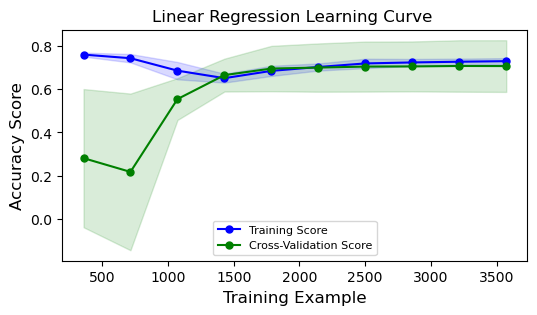

In [35]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lin_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Linear Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

**Ridge Regression**

In [36]:
from sklearn.linear_model import Ridge

In [37]:
Ridge=Ridge(alpha=0.02)
Ridge.fit(X_train_transformed, y_train)

Ridge(alpha=0.02)

In [38]:
y_pred =Ridge.predict(X_test_transformed)
y_pred[0:5]

array([[0.08730123],
       [0.01602339],
       [0.00043218],
       [0.00967423],
       [0.00024953]])

In [39]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [40]:
Results_Ridge = pd.DataFrame([['Ridge', MSE , MAE, R2_Score , RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE'])
Results_Ridge

,Model,MSE,MAE,R2_Score,RMSE
0,Ridge,0.012,0.039,0.83,0.11


In [41]:
# Cross-validation On Traing set:

scores = cross_val_score(Ridge, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.16018691 0.14736951 0.10385606 0.08078286 0.11361053]
Mean: 0.12116117423269326
Standard deviation: 0.028971615691438277


In [42]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  72.546 % Variance:  1.095 %


In [43]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Ridge = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Ridge"] * len(CV_Ridge)  # Replace [1] with the desired values for the new column
CV_Ridge = pd.concat([pd.Series(MODEL, name='Model'), CV_Ridge], axis=1)

CV_Ridge

,Model,Mean Accuracy,Std Accuracy
0,Ridge,72.546,1.047


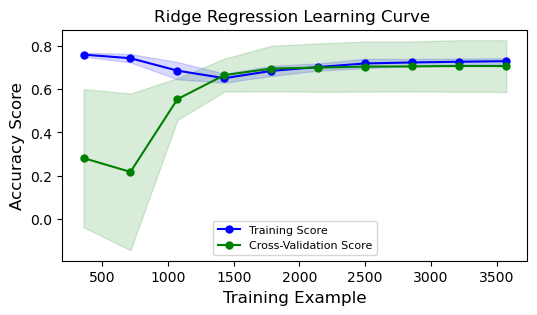

In [44]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Ridge, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Ridge Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**Lasso Regression**

In [45]:
from sklearn.linear_model import Lasso

In [46]:
Lasso=Lasso(alpha=0.02)
Lasso.fit(X_train_transformed, y_train)

Lasso(alpha=0.02)

In [47]:
y_pred =Lasso.predict(X_test_transformed)

In [48]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [49]:
Results_Lasso = pd.DataFrame([['Lasso', MSE , MAE, R2_Score , RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE'])
Results_Lasso

,Model,MSE,MAE,R2_Score,RMSE
0,Lasso,0.014,0.041,0.806,0.117


In [50]:
# Cross-validation On Traing set:

scores = cross_val_score(Lasso, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.16819994 0.150907   0.09689825 0.08537529 0.11712957]
Mean: 0.12370201030911061
Standard deviation: 0.031466658373047955


In [51]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(Lasso, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  71.078 % Variance:  1.467 %


In [52]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Lasso = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Lasso"] * len(CV_Lasso)  # Replace [1] with the desired values for the new column
CV_Lasso = pd.concat([pd.Series(MODEL, name='Model'), CV_Lasso], axis=1)

CV_Lasso

,Model,Mean Accuracy,Std Accuracy
0,Lasso,71.078,1.211


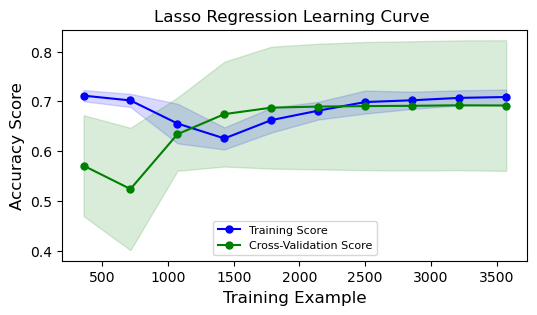

In [53]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Lasso, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Lasso Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**Elastic Net Regression**

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
enr = ElasticNet(alpha=0.02)
enr.fit(X_train_transformed, y_train)

ElasticNet(alpha=0.02)

In [56]:
y_pred =enr.predict(X_test_transformed)

In [57]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [0.06399582 0.01859939 0.01554482 0.01660735 0.01317153]
Actual 1-5:       precipitation_rate
4270                0.15
2846                0.00
2661                0.00
856                 0.00
476                 0.00


In [58]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [59]:
Results_ElasticNet = pd.DataFrame([['ElasticNet', MSE , MAE, R2_Score , RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE'])
Results_ElasticNet

,Model,MSE,MAE,R2_Score,RMSE
0,ElasticNet,0.013,0.038,0.814,0.115


In [60]:
# Cross-validation On Traing set:

scores = cross_val_score(enr, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.16605542 0.15007503 0.09860076 0.08343948 0.11570488]
Mean: 0.12277511504824079
Standard deviation: 0.030984352747606917


In [61]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(enr, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  71.582 % Variance:  1.378 %


In [62]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_ElasticNet = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["ElasticNet"] * len(CV_ElasticNet)  
CV_ElasticNet = pd.concat([pd.Series(MODEL, name='Model'), CV_ElasticNet], axis=1)

CV_ElasticNet

,Model,Mean Accuracy,Std Accuracy
0,ElasticNet,71.582,1.174


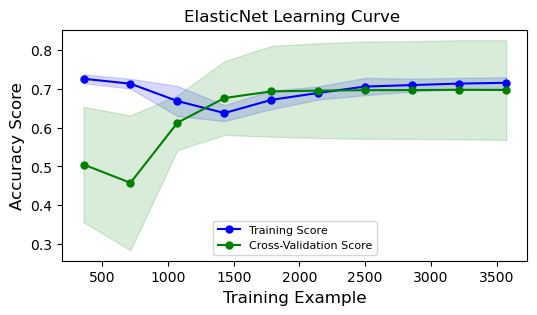

In [63]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=enr, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('ElasticNet Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**Bayesian Ridge regression**

In [64]:
from sklearn.linear_model import BayesianRidge

In [65]:
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train_transformed, y_train)

BayesianRidge()

In [66]:
y_pred =bayesian_reg.predict(X_test_transformed)
#y_pred

In [67]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [68]:
Results_Bayesian_Reg = pd.DataFrame([['Bayesian_Reg', MSE , MAE, R2_Score , RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE'])
Results_Bayesian_Reg

,Model,MSE,MAE,R2_Score,RMSE
0,Bayesian_Reg,0.012,0.038,0.83,0.11


In [69]:
# Cross-validation On Traing set:

scores = cross_val_score(bayesian_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.16041003 0.14725308 0.10373986 0.08050345 0.11360748]
Mean: 0.12110278044120952
Standard deviation: 0.02910276261019348


In [70]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(bayesian_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  72.563 % Variance:  1.108 %


In [71]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Bayesian_Reg = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Bayesian_Reg"] * len(CV_Bayesian_Reg) 
CV_Bayesian_Reg = pd.concat([pd.Series(MODEL, name='Model'), CV_Bayesian_Reg], axis=1)

CV_Bayesian_Reg

,Model,Mean Accuracy,Std Accuracy
0,Bayesian_Reg,72.563,1.053


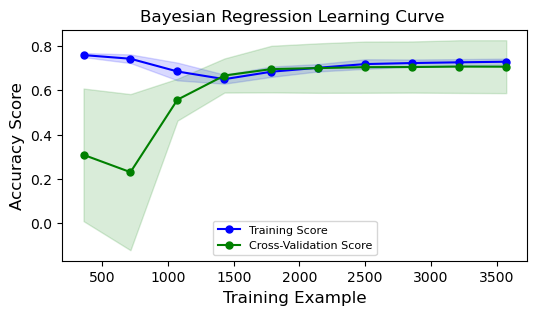

In [72]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=bayesian_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Bayesian Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**Decision Tree Regressor**

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train_transformed, y_train)

DecisionTreeRegressor(max_depth=5)

In [75]:
y_pred =tree_reg.predict(X_test_transformed)

In [76]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [77]:
Results_DecisionTree = pd.DataFrame([['Decision Tree', MSE , MAE, R2_Score , RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE'])
Results_DecisionTree

,Model,MSE,MAE,R2_Score,RMSE
0,Decision Tree,0.009,0.015,0.87,0.096


In [78]:
# Cross-validation On Traing set:

scores = cross_val_score(tree_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.11480092 0.09987092 0.06151251 0.06311771 0.05796197]
Mean: 0.07945280536726305
Standard deviation: 0.02331065904436892


In [79]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(tree_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  86.439 % Variance:  0.641 %


In [80]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Desicion_Tree = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Decision Tree"] * len(CV_Desicion_Tree) 
CV_Desicion_Tree = pd.concat([pd.Series(MODEL, name='Model'), CV_Desicion_Tree], axis=1)

CV_Desicion_Tree

,Model,Mean Accuracy,Std Accuracy
0,Decision Tree,86.439,0.801


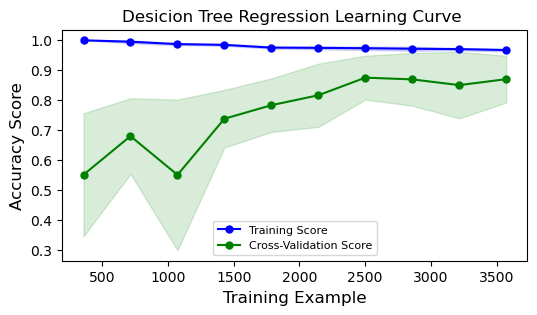

In [81]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=tree_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Desicion Tree Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**Linear SVM Regression**

In [82]:
from sklearn.svm import LinearSVR

In [83]:
svm_reg = LinearSVR(epsilon = 0.3)
svm_reg.fit(X_train_transformed, y_train)

LinearSVR(epsilon=0.3)

In [84]:
y_pred =svm_reg.predict(X_test_transformed)

In [85]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [86]:
Results_svm_reg = pd.DataFrame([['SVM', MSE , MAE, R2_Score , RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE'])
Results_svm_reg

,Model,MSE,MAE,R2_Score,RMSE
0,SVM,0.08,0.257,-0.13,0.283


In [87]:
# Cross-validation On Traing set:

scores = cross_val_score(svm_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.31308675 0.32075649 0.27799854 0.29550461 0.29302903]
Mean: 0.30007508409945516
Standard deviation: 0.015198247126027626


In [88]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(svm_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  -82.162 % Variance:  2.431 %


In [89]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_SVM_Reg  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["CV_SVM_Reg"] * len(CV_SVM_Reg ) 
CV_SVM_Reg  = pd.concat([pd.Series(MODEL, name='Model'), CV_SVM_Reg  ], axis=1)

CV_SVM_Reg 

,Model,Mean Accuracy,Std Accuracy
0,CV_SVM_Reg,-82.162,1.559


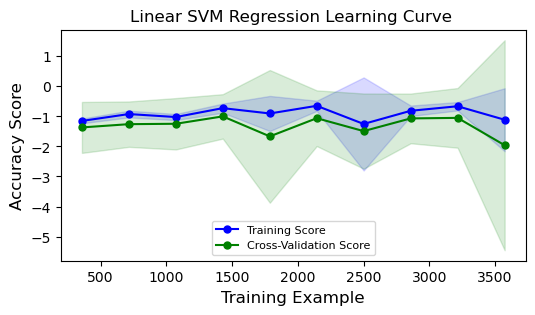

In [90]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Linear SVM Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**K-Nearest Neighbors**

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [93]:
y_pred =knn.predict(X_test_transformed)

In [94]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)


In [95]:
Results_KNN = pd.DataFrame([['KNN', MSE , MAE, R2_Score , RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE'])
Results_KNN

,Model,MSE,MAE,R2_Score,RMSE
0,KNN,0.026,0.034,0.632,0.162


In [96]:
# Cross-validation On Traing set:

scores = cross_val_score(knn, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.17204993 0.15946886 0.11923684 0.10780374 0.14210498]
Mean: 0.14013286933398478
Standard deviation: 0.023992854177337472


In [97]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(knn, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  63.559 % Variance:  0.903 %


In [98]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_KNN  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["KNN"] * len(CV_KNN ) 
CV_KNN  = pd.concat([pd.Series(MODEL, name='Model'), CV_KNN  ], axis=1)

CV_KNN 

,Model,Mean Accuracy,Std Accuracy
0,KNN,63.559,0.951


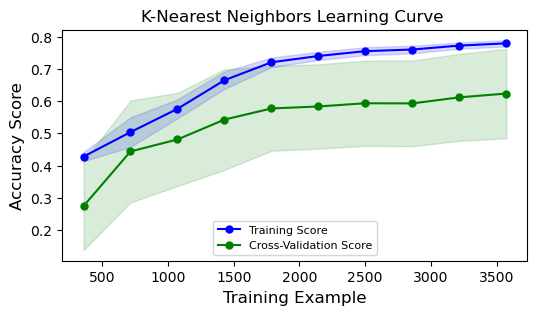

In [99]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('K-Nearest Neighbors Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**Random Forest Regressor**

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rnd=RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd.fit(X_train_transformed, y_train)

RandomForestRegressor(max_leaf_nodes=16, n_estimators=50, n_jobs=-1)

In [102]:
y_pred =rnd.predict(X_test_transformed)
#y_pred

In [103]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [104]:
Results_RandomForestReg = pd.DataFrame([['Random Forest', MSE , MAE, R2_Score,RMSE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score', "RMSE"])
Results_RandomForestReg

,Model,MSE,MAE,R2_Score,RMSE
0,Random Forest,0.012,0.014,0.828,0.111


In [105]:
# Cross-validation On Traing set:

scores = cross_val_score(rnd, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.0985806  0.10483015 0.07034221 0.05358061 0.0555568 ]
Mean: 0.07657807613122034
Standard deviation: 0.021410065836617236


In [106]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(rnd, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  89.505 % Variance:  0.266 %


In [107]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_RandomForest = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Random Forest"] * len(CV_Lasso)  
CV_RandomForest = pd.concat([pd.Series(MODEL, name='Model'), CV_RandomForest], axis=1)

CV_RandomForest

,Model,Mean Accuracy,Std Accuracy
0,Random Forest,89.505,0.516


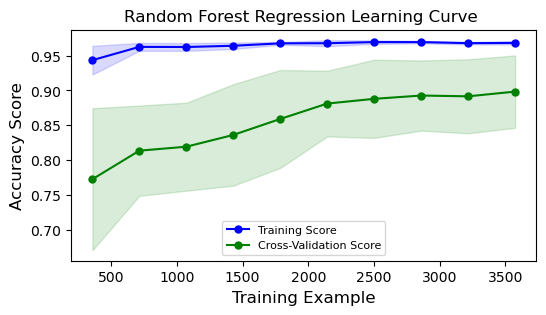

In [108]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=rnd, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Random Forest Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

# **Quick Results: precipitation_rate**

In [109]:
Result=pd.concat([Results_LinearReg, Results_Ridge, Results_Lasso, Results_ElasticNet, Results_Bayesian_Reg, Results_DecisionTree, Results_svm_reg, Results_KNN, Results_RandomForestReg])
Result.set_index('Model')
Result = Result.rename_axis('precipitation_rate')
Result

,Model,MSE,MAE,R2_Score,RMSE
precipitation_rate,,,,,
0,Linear_Reg,0.012,0.039,0.830,0.110
0,Ridge,0.012,0.039,0.830,0.110
0,Lasso,0.014,0.041,0.806,0.117
0,ElasticNet,0.013,0.038,0.814,0.115
0,Bayesian_Reg,0.012,0.038,0.830,0.110
0,Decision Tree,0.009,0.015,0.870,0.096
0,SVM,0.080,0.257,-0.130,0.283
0,KNN,0.026,0.034,0.632,0.162
0,Random Forest,0.012,0.014,0.828,0.111


* the Decision Tree model stands out with the lowest errors and the highest R2 score, indicating more predictive power. 

* The Linear, Ridge, and Bayesian models also perform well in terms of error metrics and R2 scores. 

* The SVM and KNN models appear to be less suitable based on the R2 scores and error metrics.

In [110]:
# Result from Cross-validation on Training Set:

CV_Result=pd.concat([CV_LinearReg, CV_Ridge, CV_Lasso, CV_ElasticNet, CV_Bayesian_Reg, CV_Desicion_Tree,CV_SVM_Reg, CV_KNN, CV_RandomForest])
CV_Result.set_index('Model')
CV_Result = CV_Result.rename_axis('precipitation_rate')
CV_Result

,Model,Mean Accuracy,Std Accuracy
precipitation_rate,,,
0,Linear_Reg,72.546,1.047
0,Ridge,72.546,1.047
0,Lasso,71.078,1.211
0,ElasticNet,71.582,1.174
0,Bayesian_Reg,72.563,1.053
0,Decision Tree,86.439,0.801
0,CV_SVM_Reg,-82.162,1.559
0,KNN,63.559,0.951
0,Random Forest,89.505,0.516


* Decision Tree and Random Forest models have the highest mean accuracies and relatively low standard deviations, indicating consistent and better performance. 

* Linear, Ridge, and Bayesian models also show consistent accuracy.

* SVM and KNN models seem to have limitations in their performance based on negative accuracy or lower accuracy compared to other models